   # Finding the best 'College' Wine
   
   When people think of "College" wine many people think of the wine below, a cheap boxed wine with no flavor. I, however, have a different idea of what "College" wine should be.
   
   <img src="https://cdn.pastemagazine.com/www/blogs/lists/balck%20box.jpg" width=200 height=200 />

 As a college student I like to buy things in what I call the college way, that means I like to buy wine for cheap, but I like wine that tastes good. Using this idea I decided to find the wines on this list of wine data with good scores (80-100, B or A) and a cheap price. The perfrect "College" wines.

# Importing and Looking at the Data

  First we need import the libraries we will be using in our project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
#import libraries

Then we bring in the data our data in using pandas. I also show you what the table looks like. It has great information from a description of the wine to the points and price. It also gives the country and region the wine is made in. 

In [2]:
wine = pd.read_csv('winemag-data_first150k.csv')
wine.head()
#import data

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Then we get rid of rows with 'NA' while some might still be useable many of them do not contain price which is not useful in our search for the best 'college wines'..

In [3]:
wine = wine.dropna()
#get rid of rows with na

# Looking at Distributions

It is always good to look at distributions, here we are looking at the point distribution. As you can see below it has a decent standard distribution.

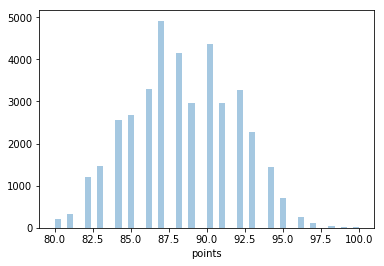

In [4]:
sns.distplot(wine['points'], kde=False);
plt.savefig('pointsBar.png', bbox_inches='tight')
plt.show()
#looking at the point distribution 

Next we look at price distribution, this is pretty bunched up below 100 dollars. 

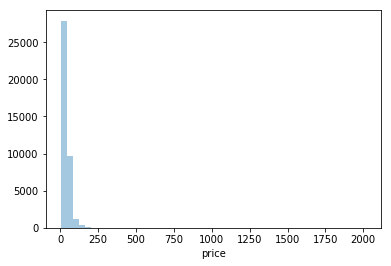

In [5]:
sns.distplot(wine['price'], kde=False);
plt.savefig('priceBar.png', bbox_inches='tight')
plt.show()
#looking at distribution of price

This graph shows points and price in relation to each other. The points show the range of price at each point value. While the line shows that price does increase with the amount of points.

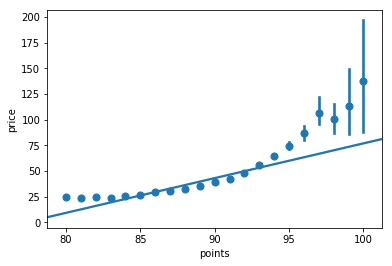

In [6]:
sns.regplot(x='points', y='price', x_estimator=np.mean, data=wine)
plt.savefig('pricePointsScatter.png', bbox_inches='tight')
plt.show()
#shows price and points on the same scale

# Breaking the Data up and Adding Points/Price

Here we combine points and price by dividing points by price to make an number representing the quality of wine divided by the price. 

In [7]:
points_by_price = wine['points'] / wine['price']
#create points divided by price
s1 = pd.Series(points_by_price, name = 'Points by Price')
#create a series with points divided by price
wine2 = pd.concat([wine, s1], axis = 1)
#add points by price to wine data

Here is that distribution which is more favorable to the lower pointed wine.

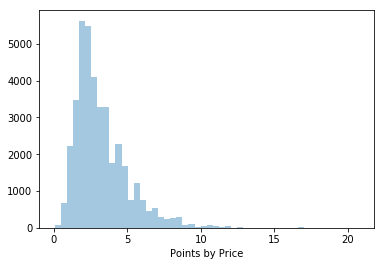

In [8]:
sns.distplot(wine2['Points by Price'], kde=False);
plt.savefig('pointsByPriceBar.png', bbox_inches='tight')
plt.show()
#look at distribution of points divided by price

Now as a US citizen it is easier for me to get US wine, I decided to focus on wine made in the US over other countries. I also look at the distribution which looks simlar to the points by price graph above with all of the data.

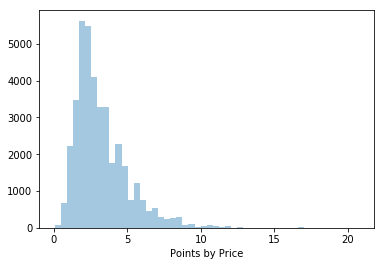

In [9]:
US = wine['country'].map(lambda x: str(x).startswith('US'))
#get a boolean list with true being us in country
USwine = wine2[US]
#make a list of just us wines
USwine = USwine.dropna()
#drop na rows
sns.distplot(USwine['Points by Price'], kde=False);
plt.savefig('USpointsByPriceBar.png', bbox_inches='tight')
plt.show()
#look at distribution of wines

# Top US 'College' Wines

Here are the top ten "College" wines.

The one I would try on this list would be the Gallo Family Vineyard Cabernet Sauvignon which is number three on our list.
<img src="https://www.drinkupessex.uk/wp-content/uploads/2015/07/gallo-family-vineyards-cabernet-sauvignon-red-wine.jpg" width=400 height=400 />
Which comes from California, but not from a normal wine region in California. It is also a grand total of 5 USD, cheap and it has a score of 85 which even off a ten point scale is a B.

In [10]:
sorted_US = USwine.sort_values(by = ['Points by Price'], ascending=False)
#look at the list sorted by points by price
sorted_US.head(10)
#look at top ten

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,Points by Price
114167,114167,US,"Easy, simple peach and strawberry flavors are ...",White Zinfandel,83,4.0,California,California,California Other,Zinfandel,Round Hill,20.75
1858,1858,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Chardonnay,Pam's Cuties,20.75
113519,113519,US,For five bucks you get plenty of lush cherry-b...,Twin Valley,85,5.0,California,California,California Other,Cabernet Sauvignon,Gallo Family Vineyards,17.00
134729,134729,US,For five bucks you get plenty of lush cherry-b...,Twin Valley,85,5.0,California,California,California Other,Cabernet Sauvignon,Gallo Family Vineyards,17.00
113636,113636,US,"This dry, crisp rosé is 100% Cabernet Sauvigno...",Autumn's Blush,84,5.0,California,Lodi,Central Valley,Cabernet Sauvignon,Peirano,16.80
150386,150386,US,"This dry, crisp rosé is 100% Cabernet Sauvigno...",Autumn's Blush,84,5.0,California,Lodi,Central Valley,Cabernet Sauvignon,Peirano,16.80
114362,114362,US,The red that helped build the House of Gallo n...,Hearty Burgundy,84,5.0,California,California,California Other,Red Blend,Gallo Family Vineyards,16.80
113776,113776,US,"When I was getting into wine, Gallo's inexpens...",Twin Valley,84,5.0,California,California,California Other,Sauvignon Blanc,Gallo Family Vineyards,16.80
68576,68576,US,"This dry, crisp rosé is 100% Cabernet Sauvigno...",Autumn's Blush,84,5.0,California,Lodi,Central Valley,Cabernet Sauvignon,Peirano,16.80
135046,135046,US,"When I was getting into wine, Gallo's inexpens...",Twin Valley,84,5.0,California,California,California Other,Sauvignon Blanc,Gallo Family Vineyards,16.80


Looking at the top ten wines you can see that it favors the lower point wines more than I though so here is the top ten wines 90 or higher. 
My pick from the list would be the Arbor Crest Sauvignon Blanc at number 4 on this list.
<img src="https://thewashingtonvine.files.wordpress.com/2012/08/img_1899.jpg" width=200 height=200 />

This can be found a Washington State which I am now seeing seems to be a larger wine producer in the US then I thought. This wine is still only 8 USD, still cheap and has a score of 91 or an A on a ten point scale.

In [11]:
GT80 = USwine['points'].map(lambda x: x > 89)
#only look at points 90 or above
GT80USwine = USwine[GT80]
#turn it into a series
sorted_US = GT80USwine.sort_values(by = ['Points by Price'], ascending=False)
#sort by points by price
sorted_US.head(10)
#look at top ten

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,Points by Price
69768,69768,US,"Very classy, and classic, WA Riesling, with ju...",Johannisberg,90,7.0,Washington,Washington,Washington Other,Riesling,Latah Creek,12.857143
140448,140448,US,"Very classy, and classic, WA Riesling, with ju...",Johannisberg,90,7.0,Washington,Washington,Washington Other,Riesling,Latah Creek,12.857143
110140,110140,US,"With full ripeness, density and concentration,...",Winemaker's Select,91,8.0,Washington,Columbia Valley (WA),Columbia Valley,Riesling,Snoqualmie,11.375000
19989,19989,US,"Pungent aromas of concentrated stone fruits, b...",Bacchus Vineyard,91,8.0,Washington,Columbia Valley (WA),Columbia Valley,Sauvignon Blanc,Arbor Crest,11.375000
63859,63859,US,Future vintages of this wine will bear the new...,Klipsun Vineyard,90,8.0,Washington,Columbia Valley (WA),Columbia Valley,Sauvignon Blanc,Waterbrook,11.250000
49386,49386,US,"Mostly old vine (mid-1970s) Riesling, this has...",White,90,8.0,Washington,Columbia Valley (WA),Columbia Valley,Riesling,Barnard Griffin,11.250000
15438,15438,US,"This is an astonishing value, especially from ...",Reserve,90,8.0,California,Sonoma Coast,Sonoma,Pinot Noir,Gallo of Sonoma,11.250000
148699,148699,US,Future vintages of this wine will bear the new...,Klipsun Vineyard,90,8.0,Washington,Columbia Valley (WA),Columbia Valley,Sauvignon Blanc,Waterbrook,11.250000
145398,145398,US,"This is an astonishing value, especially from ...",Reserve,90,8.0,California,Sonoma Coast,Sonoma,Pinot Noir,Gallo of Sonoma,11.250000
53469,53469,US,"This tangy, all-stainless, lightly grassy, dry...",Fumé Blanc,91,9.0,Washington,Columbia Valley (WA),Columbia Valley,Sauvignon Blanc,Barnard Griffin,10.111111


Just in case you want to get some fancy "College" wine here are the top ten wines pointed 95 or higher. I like a good Riesling and Januik's is top of our list.
<img src="https://cdn.nexternal.com/nhj/images/2015RieslingBacchusNV.jpg" width="200" height="200" />
Here is the wine you would be looking for and with this table you can find wine region which is the Columbia Valley which a map of that region is this,
<img src="http://winefolly.wpengine.netdna-cdn.com/wp-content/uploads/2017/02/USA-Washington-Wine-Map-Wine-Folly.jpg" width="500" height="500" />
This wine is starting to be more on the expensive side with a 20 USD price tag, but with a 95 score it is a strong A.

In [12]:
GT90 = USwine['points'].map(lambda x: x > 94)
#look at points 95 and over
GT90USwine = USwine[GT90]
#make a list of 95 and over point wines
sorted_US = GT90USwine.sort_values(by = ['Points by Price'], ascending=False)
#sort it
sorted_US.head(10)
#look at top ten

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,Points by Price
51461,51461,US,Spectacular is the word that comes to mind her...,Bacchus Vineyard,95,20.0,Washington,Columbia Valley (WA),Columbia Valley,Riesling,Januik,4.750000
85050,85050,US,"Truly stunning, the Lewis Estate Riesling from...",Lewis Estate Vineyard,95,20.0,Washington,Columbia Valley (WA),Columbia Valley,Riesling,Dunham,4.750000
136525,136525,US,This dessert wine has pushed itself to the fro...,Tears of Dew Late Harvest,95,22.0,California,Paso Robles,Central Coast,Moscato,EOS,4.318182
130255,130255,US,"With 21% residual sugar, this is an enormously...",Tears of Dew Late Harvest,95,22.0,California,Paso Robles,Central Coast,Moscato,EOS,4.318182
115165,115165,US,This dessert wine has pushed itself to the fro...,Tears of Dew Late Harvest,95,22.0,California,Paso Robles,Central Coast,Moscato,EOS,4.318182
102565,102565,US,"With 21% residual sugar, this is an enormously...",Tears of Dew Late Harvest,95,22.0,California,Paso Robles,Central Coast,Moscato,EOS,4.318182
20,20,US,Heitz has made this stellar rosé from the rare...,Grignolino,95,24.0,California,Napa Valley,Napa,Rosé,Heitz,3.958333
137390,137390,US,"Among McCrea's Rhône-inspired white wines, thi...",Boushey Vineyard Sirocco Blanc,95,25.0,Washington,Yakima Valley,Columbia Valley,White Blend,McCrea,3.800000
137384,137384,US,"Beautifully floral, fragrant and evocative, wi...",Sémillon-Sauvignon-Muscadelle,95,25.0,Washington,Columbia Valley (WA),Columbia Valley,Semillon-Sauvignon Blanc,Buty,3.800000
56985,56985,US,"Massively fruity and oaky, this is an atom bom...",Los Alamos Vineyard,95,25.0,California,Santa Barbara County,Central Coast,Chardonnay,Au Bon Climat,3.800000


# Looking at What was said about the Wines

With my tables I can look up also the best "College" chardonnay, Moscato, or any other type of wine. There are a ton of different wines on this list and looking at top tens or best "College" wines would take a lot of time and make a lot of tables. Instead I decided to look at the description column and see what words where commonly used to describe our wines.

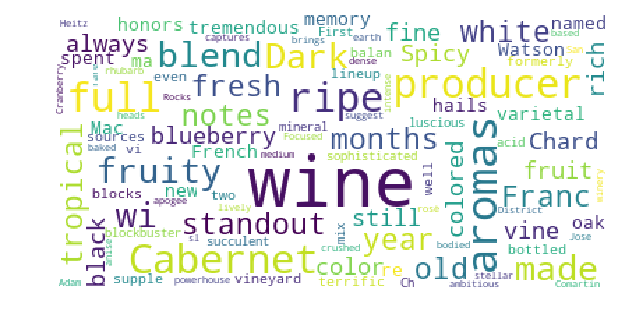

In [13]:
mpl.rcParams['figure.figsize']=(10.0,5.0)
mpl.rcParams['font.size']=20                
mpl.rcParams['savefig.dpi']=100              
mpl.rcParams['figure.subplot.bottom']=.1 
#make the frame the wordcloud will be in

stopwords = set(STOPWORDS)
data = USwine
#get stop words and the data

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=50, 
                          random_state=False
                         ).generate(str(data['description']))
#varibles for the wordcloud

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud.png', bbox_inches='tight')
plt.show()
#show wordcloud


Here we can see that they like to talk about the fruity taste, the blend, and how rich it is. Since this is a list with wines only 80 or above as you can see above most of the words are positive or describing the wines. After you drink some of the wines on this list I think a good next step would be to look at what words they use to describe your favorites and then search for other wines that are fruity, rich, or any other words in the description. That would give you a great starting point to find other great "College" wines.